# SherLock

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
pd.set_option('display.max_columns', None)

2016_Q3

Time begin
Friday, 
2016 07 01 00:00:00
1467352800000

Time end
Friday, July 15
2016 07 15 00:00:00
1468562400000

'''awk '{ if ($2 > 1467352800000 && $2 < 1468562400000) print $0 }' sherlock-2016_Q3-allbroadcastprobe-000000_0 > F2wks_sherlock-2016_Q3-allbroadcastprobe-000000_0.tsv'''

## Load Data

This will cycle through all the data found in the Kaggle subset data, 'archive'.

### Functions Used

In [3]:
# Functions
#def editTextFile(f):
#    # Read in the file
#    with open(f, 'r') as file:
#        filedata = file.read()
#
#    # Replace the target string
#    filedata = filedata.replace('[msec],size','[msec];size')
#
#    # Write the file out again
#    with open('editTextFile.txt', 'w') as file:
#        file.write(filedata)
#        
#def magVector(df,col1,col2,col3):
#    # Calculate magnitude of vector - SQRT(X^2 + Y^2 + Z^2)
#    return ((df[col1].pow(2) + df[col2].pow(2) + df[col3].pow(2)).pow(1/2))        

### Loading

### PUSH Sensor Table

In [4]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-apppackages-000000_0.tsv'
header_list = ['userid','uuid','action','appPackage','appuid','app_name','installsrc',
               'installtime','packagehash','permissions','versionname','versioncode', 
               'sherlock_version']
AppPackages = pd.read_csv(filename,sep='\t',names=header_list)
AppPackages = AppPackages.sort_values(by='uuid')             # Ensure sorted by time
AppPackages['trigger_AppPackages'] = 1                    # Added column as a marker for PUSH action
print('Shape: ',AppPackages.shape)
AppPackages.head(3)

Shape:  (8687, 14)


,userid,uuid,action,appPackage,appuid,app_name,installsrc,installtime,packagehash,permissions,versionname,versioncode,sherlock_version,trigger_AppPackages
0,abd6f757b8,1467352803958,Removed,com.google.android.apps.plus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3.4,1
1,abd6f757b8,1467352811259,Added,com.google.android.apps.plus,10146.0,Google+,com.android.vending,1.406005e+12,fe66454f11d8b556202f6da1c7fc7e17ca49ab7d,[com.google.android.apps.plus.permission.C2D_M...,8.2.0.125624966,416073409.0,2.3.4,1
2,abd6f757b8,1467352812613,Updated,com.google.android.apps.plus,10146.0,Google+,com.android.vending,1.406005e+12,fe66454f11d8b556202f6da1c7fc7e17ca49ab7d,[com.google.android.apps.plus.permission.C2D_M...,8.2.0.125624966,416073409.0,2.3.4,1


In [5]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-allbroadcastprobe-000000_0.tsv'
header_list = ['userid','uuid','extras','action','broadcastintents_timestamp']
BroadcastIntents = pd.read_csv(filename,sep='\t',names=header_list,parse_dates=['broadcastintents_timestamp'])
BroadcastIntents = BroadcastIntents.sort_values(by='uuid')            # Ensure sorted by time
BroadcastIntents['trigger_BroadcastIntents'] = 1                    # Added column as a marker for PUSH action
print('BroadcastIntents Shape: ',BroadcastIntents.shape)
BroadcastIntents.head(3)

BroadcastIntents Shape:  (6452184, 6)


,userid,uuid,extras,action,broadcastintents_timestamp,trigger_BroadcastIntents
0,b298fa1895,1467352800213,,android.bluetooth.adapter.action.STATE_CHANGED,2016-07-01 09:00:00.212,1
1,8ef449026a,1467352800408,,android.bluetooth.adapter.action.STATE_CHANGED,2016-07-01 09:00:00.407,1
2,8ef449026a,1467352800626,,android.bluetooth.adapter.action.LOCAL_NAME_CH...,2016-07-01 09:00:00.625,1


In [6]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-call-000000_0.tsv'
header_list = ['userid','uuid','address','date','duration','fromcontacts','type']
Call = pd.read_csv(filename,sep='\t',names=header_list)
Call = Call.sort_values(by='uuid')            # Ensure sorted by time
Call['trigger_Call'] = 1                    # Added column as a marker for PUSH action
print('Call Shape: ',Call.shape)
Call.head(3)

Call Shape:  (14103, 8)


,userid,uuid,address,date,duration,fromcontacts,type,trigger_Call
0,bca57e81a1,1467352853414,386ae17171b3e19,1467352815802,0,True,3,1
1,bca57e81a1,1467352853414,386ae17171b3e19,1467352772324,0,True,3,1
2,68a5ffab20,1467352857115,8994d2a0de2f95a,1467352561485,0,True,2,1


In [7]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-moriartyprobe-000000_0.tsv'
header_list = ['userid','uuid','details','action','actionType','sessionType','Mor_version',
               'sessionID','behavior']
MoriartyProbe = pd.read_csv(filename,sep='\t',names=header_list)
MoriartyProbe = MoriartyProbe.sort_values(by='uuid')            # Ensure sorted by time             
MoriartyProbe['trigger_MoriartyProbe'] = 1                    # Added column as a marker for PUSH action
print('MoriartyProbe Shape: ',MoriartyProbe.shape)

MoriartyUsers = MoriartyProbe['userid'].unique()                # Create list of labeled users

MoriartyProbe.head(3)

MoriartyProbe Shape:  (9146, 10)


,userid,uuid,details,action,actionType,sessionType,Mor_version,sessionID,behavior,trigger_MoriartyProbe
0,9f7c0cf3ba,1467352800388,Entered Level view,View Change,benign,malicious,6.0,5,benign,1
1,9f7c0cf3ba,1467352802547,Entered Game Details view,View Change,benign,malicious,6.0,5,benign,1
2,9f7c0cf3ba,1467352807124,Entered Bonus Equip view,View Change,benign,malicious,6.0,5,benign,1


In [8]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-screenon-000000_0.tsv'
header_list = ['userid','uuid','screenon','screenstatus_timestamp']
ScreenStatus = pd.read_csv(filename,sep='\t',names=header_list,parse_dates=['screenstatus_timestamp'])
ScreenStatus = ScreenStatus.sort_values(by='uuid')
ScreenStatus['trigger_ScreenStatus'] = 1                    # Added column as a marker for PUSH action
print('ScreenStatus Shape: ',ScreenStatus.shape)
ScreenStatus.tail()

ScreenStatus Shape:  (105647, 5)


,userid,uuid,screenon,screenstatus_timestamp,trigger_ScreenStatus
105642,68a5ffab20,1468562308739,True,2016-07-15 08:58:28.739,1
105643,688dccef72,1468562309068,True,2016-07-15 08:58:29.068,1
105644,68a5ffab20,1468562331918,False,2016-07-15 08:58:51.918,1
105645,fd2db8f0be,1468562350869,False,2016-07-15 08:59:10.868,1
105646,68a5ffab20,1468562367166,True,2016-07-15 08:59:27.165,1


In [9]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-sms-000000_0.tsv'
header_list = ['userid','uuid','addres','containsURL','date','fromcontacts','type']
SMS = pd.read_csv(filename,sep='\t',names=header_list)
SMS = SMS.sort_values(by='uuid')
SMS['trigger_SMS'] = 1                    # Added column as a marker for PUSH action
print('SMS Shape: ',ScreenStatus.shape)
SMS.head(3)

SMS Shape:  (105647, 5)


,userid,uuid,addres,containsURL,date,fromcontacts,type,trigger_SMS
0,dd25a68e9e,1467353406333,95e3e156163e818,False,1467352257525,False,2,1
1,dd25a68e9e,1467353541941,95e3e156163e818,False,1467352257525,False,2,1
2,a4f29791af,1467354416286,96a0a1b056726f7,False,1467353329748,True,2,1


In [10]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-userpresentprobe-000000_0.tsv'
header_list = ['userid','uuid','userpresence_timestamp']
UserPresence = pd.read_csv(filename,sep='\t', names=header_list, parse_dates=['userpresence_timestamp'])
UserPresence = UserPresence.sort_values(by='uuid')
UserPresence['trigger_UserPresence'] = 1                    # Added column as a marker for PUSH action
print('UserPresence Shape: ', UserPresence.shape)
UserPresence.head(3)

UserPresence Shape:  (27682, 4)


,userid,uuid,userpresence_timestamp,trigger_UserPresence
0,2cd992fd5e,1467352833981,2016-07-01 09:00:33.975,1
1,8ef449026a,1467352856605,2016-07-01 09:00:56.588,1
2,abd6f757b8,1467352858822,2016-07-01 09:00:58.805,1


### PULL Sensor Table

In [11]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-bluetooth-000000_0.tsv'
header_list = ['userid','uuid','bluetooth_appearance','bluetooth_class','bluetooth_maddress',
               'bluetooth_mremotebrsf','bluetooth_mvaluenrec','bluetooth_mvaluewbs','bluetooth_name',
               'bluetooth_rssi','bluetooth_timestamp']
Bluetooth = pd.read_csv(filename, sep='\t',names=header_list,parse_dates=['bluetooth_timestamp'])
Bluetooth = Bluetooth.sort_values(by='uuid')                            # Ensure sorted by time

#Bluetooth_tsv = Bluetooth_tsv.drop(columns=['bluetooth_mremotebrsf',
#                                            'bluetooth_mvaluenrec',
#                                            'bluetooth_mvaluewbs']) # Nan's and singular values, depricated or can be set NULL = 0
print('Bluetooth Shape: ',Bluetooth.shape)
Bluetooth.head(3)

Bluetooth Shape:  (113826, 11)


,userid,uuid,bluetooth_appearance,bluetooth_class,bluetooth_maddress,bluetooth_mremotebrsf,bluetooth_mvaluenrec,bluetooth_mvaluewbs,bluetooth_name,bluetooth_rssi,bluetooth_timestamp
0,65f42fb278,1467352819196,0.0,7936,bd8becf2845d152,NaN,NaN,NaN,ced6ff47171a234,-84,2016-07-01 08:59:56.575
1,1775bd8416,1467352829688,0.0,5898764,1b1bf72e4fa8e62,NaN,NaN,NaN,d4f8932518c960e,-83,2016-07-01 09:00:29.681
2,aa2e99301a,1467352847977,0.0,263172,94a213c28adcd7f,NaN,NaN,NaN,35f57801a8c62ed,-91,2016-07-01 09:00:47.972


In [12]:
# note input file has corruption 'il' in 2 places
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-t0-000000_0.tsv'
header_list = ['userid','uuid','version','telephoney_deviceid','telephoney_devicesoftwareversion',
               'telephoney_networkcountryiso','telephoney_networkoperator','telephoney_networkoperatorname','telephoney_networktype',
               'telephoney_phonetype','telephoney_simcountryiso','telephoney_simoperator','telephoney_simoperatorname',
               'telephoney_simserialnumber','telephoney_simstate','telephoney_subscriberid','telephoney_hassicccard',
               'telephoney_timestamp','hardware_wifimac','hardware_bluetoothmac','hardware_androidid','hardware_brand',
             'hardware_model','hardware_deviceid','systeminfo_os_version','systeminfo_baseband_version','systeminfo_sdk','systeminfo_kernelinfo','systeminfo_timestamp']

T0 = pd.read_csv(filename,sep='\t',names=header_list)
T0 = T0.sort_values(by='uuid')
print('T0 Shape: ', T0.shape)
T0.head(3)

T0 Shape:  (1056, 29)


,userid,uuid,version,telephoney_deviceid,telephoney_devicesoftwareversion,telephoney_networkcountryiso,telephoney_networkoperator,telephoney_networkoperatorname,telephoney_networktype,telephoney_phonetype,telephoney_simcountryiso,telephoney_simoperator,telephoney_simoperatorname,telephoney_simserialnumber,telephoney_simstate,telephoney_subscriberid,telephoney_hassicccard,telephoney_timestamp,hardware_wifimac,hardware_bluetoothmac,hardware_androidid,hardware_brand,hardware_model,hardware_deviceid,systeminfo_os_version,systeminfo_baseband_version,systeminfo_sdk,systeminfo_kernelinfo,systeminfo_timestamp
0,55bd790216,1467353136735,2.3.3,434f8b2b6de8beb,il,dd018b3f6e1eb6a,f41485e25d71e1d,10.0,1.0,il,ca429444badf6d2,f41485e25d71e1d,4fac2a95bef8489,5.0,4d5f317cf117e97,True,2016-07-01 08:05:36.631,4c8d8228b0b59de,4c8d8228b0b59de,5b8526d4aba6722,samsung,SM-G900F,434f8b2b6de8beb,6.0.1,G900FXXU1CPEM,23.0,Linux version 3.4.0-7182592 (dpi@SWHC3710) (gc...,2016-07-01 08:05:36.611,NaN
1,9f7c0cf3ba,1467356315569,2.3.5,79079a54964ad5a,il,92e055c4dafbd0c,80ad7ddb0f44e18,15.0,1.0,il,92e055c4dafbd0c,c9048436c89156b,3e3d20f09ed3553,5.0,84c636d4d4f630b,True,2016-07-01 08:58:35.474,c915bf52932b5df,a0edf95d597df2e,485d65080dd0058,samsung,SM-G900F,79079a54964ad5a,4.4.2,G900FXXU1ANG7,19.0,Linux version 3.4.0-2289584 (dpi@SWDD5021) (gc...,2016-07-01 08:58:35.444,NaN
2,abd6f757b8,1467357245333,2.3.4,2aef23a74cb4ae7,il,577334b1f1e08d9,46202bed652193e,10.0,1.0,il,e0f2c7b46a3e04a,46202bed652193e,6d7adb9ef6331d5,5.0,be62fcffc39e53e,True,2016-07-01 09:14:05.265,8b006b5a7a0153e,d40ab6a88f1cf0c,818b4b6b23619c4,samsung,SM-G900F,2aef23a74cb4ae7,4.4.2,G900FXXU1ANG7,19.0,Linux version 3.4.0-2289584 (dpi@SWDD5021) (gc...,2016-07-01 09:14:05.27,NaN


In [13]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-t1-a_000000_0.tsv'
header_list = ['userid','uuid','t1_version','googleplayloc_speed','googleplayloc_maccuracy',
               'googleplayloc_timestamp','celltower_cid','celltower_lac','celltower_psc',
               'celltower_timestamp','celltower_type','status_alarmvol','status_brightnessmode',
               'status_brightness_file','status_brightness_settings','status_dtmfvol','status_musicvol',
               'status_notificationvol','status_orientation','status_ringermode','status_ringtonevol',
               'status_systemvol','status_voicecallvol','status_timestamp',
               'location_spatio_5means','location_spatio_10means','location_spatio_25means',
               'location_spatio_50means','location_spatio_75means','location_spatio_100means',
               'location_spatioTemporal_day_5means','location_spatioTemporal_day_25means',
               'location_spatioTemporal_day_100means','location_spatioTemporal_week_5means',
               'location_spatioTemporal_week_25means','location_spatioTemporal_week_100means']
T1 = pd.read_csv(filename,sep='\t',names=header_list,parse_dates=['googleplayloc_timestamp',
                                                                  'celltower_timestamp',
                                                                  'status_timestamp'])
T1 = T1.sort_values(by='uuid')
print('T1 Shape: ', T1.shape)
T1.head(3)

T1 Shape:  (586865, 36)


,userid,uuid,t1_version,googleplayloc_speed,googleplayloc_maccuracy,googleplayloc_timestamp,celltower_cid,celltower_lac,celltower_psc,celltower_timestamp,celltower_type,status_alarmvol,status_brightnessmode,status_brightness_file,status_brightness_settings,status_dtmfvol,status_musicvol,status_notificationvol,status_orientation,status_ringermode,status_ringtonevol,status_systemvol,status_voicecallvol,status_timestamp,location_spatio_5means,location_spatio_10means,location_spatio_25means,location_spatio_50means,location_spatio_75means,location_spatio_100means,location_spatioTemporal_day_5means,location_spatioTemporal_day_25means,location_spatioTemporal_day_100means,location_spatioTemporal_week_5means,location_spatioTemporal_week_25means,location_spatioTemporal_week_100means
0,dd25a68e9e,1467352803050,2.3.3,0.0,30.0,2016-07-01 08:59:23.498,e70d239ab6a53f4,e312410e19e48ce,968023314bbc547,2016-07-01 08:59:23.072,1.0,4.0,Manual,0.0,255.0,0.0,12.0,0.0,Portrait,Normal,0.0,0.0,5.0,2016-07-01 08:59:23.068,3.0,5.0,3.0,16.0,58.0,65.0,2.0,19.0,35.0,5.0,6.0,63.0
1,cfdf8f8818,1467352806257,2.3.3,NaN,NaN,NaT,aa93a182dc36b6f,badeeedcbea86f5,955660c4dc9c2bb,2016-07-01 08:59:26.188,1.0,11.0,Manual,0.0,118.0,15.0,15.0,15.0,Portrait,Normal,15.0,15.0,5.0,2016-07-01 08:59:26.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c1f751a99,1467352810246,2.3.3,NaN,NaN,NaT,f01943ddc309f5c,e6fe77b140f3d19,8abe479aaa1ec14,2016-07-01 08:59:30.203,1.0,11.0,Auto,0.0,134.0,15.0,1.0,1.0,Portrait,Normal,15.0,1.0,4.0,2016-07-01 08:59:30.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-t2-000000_0.tsv'
header_list = ['userid','uuid','version','t2_timestamp','accelerometerstat_x_dc_fft','accelerometerstat_x_first_idx_fft',
               'accelerometerstat_x_first_val_fft','accelerometerstat_x_fourth_idx_fft','accelerometerstat_x_fourth_val_fft',
               'accelerometerstat_x_mean','accelerometerstat_x_mean_fft','accelerometerstat_x_median','accelerometerstat_x_median_fft',
               'accelerometerstat_x_second_idx_fft','accelerometerstat_x_second_val_fft','accelerometerstat_x_third_idx_fft',
               'accelerometerstat_x_third_val_fft','accelerometerstat_x_var','accelerometerstat_x_var_fft','accelerometerstat_y_dc_fft',
               'accelerometerstat_y_first_idx_fft','accelerometerstat_y_first_val_fft','accelerometerstat_y_fourth_idx_fft',
               'accelerometerstat_y_fourth_val_fft','accelerometerstat_y_mean','accelerometerstat_y_mean_fft','accelerometerstat_y_median',
               'accelerometerstat_y_median_fft','accelerometerstat_y_second_idx_fft','accelerometerstat_y_second_val_fft',
               'accelerometerstat_y_third_idx_fft','accelerometerstat_y_third_val_fft','accelerometerstat_y_var','accelerometerstat_y_var_fft']
T2 = pd.read_csv(filename,sep='\t',names=header_list)
print('T2 Shape: ',T2.shape)
T2.head(3)

/Users/kent/opt/anaconda3/envs/sherlock/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (49,50,51,97,98,99,145,146,147,184,185,186) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


T2 Shape:  (1742743, 34)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,userid,uuid,version,t2_timestamp,accelerometerstat_x_dc_fft,accelerometerstat_x_first_idx_fft,accelerometerstat_x_first_val_fft,accelerometerstat_x_fourth_idx_fft,accelerometerstat_x_fourth_val_fft,accelerometerstat_x_mean,accelerometerstat_x_mean_fft,accelerometerstat_x_median,accelerometerstat_x_median_fft,accelerometerstat_x_second_idx_fft,accelerometerstat_x_second_val_fft,accelerometerstat_x_third_idx_fft,accelerometerstat_x_third_val_fft,accelerometerstat_x_var,accelerometerstat_x_var_fft,accelerometerstat_y_dc_fft,accelerometerstat_y_first_idx_fft,accelerometerstat_y_first_val_fft,accelerometerstat_y_fourth_idx_fft,accelerometerstat_y_fourth_val_fft,accelerometerstat_y_mean,accelerometerstat_y_mean_fft,accelerometerstat_y_median,accelerometerstat_y_median_fft,accelerometerstat_y_second_idx_fft,accelerometerstat_y_second_val_fft,accelerometerstat_y_third_idx_fft,accelerometerstat_y_third_val_fft,accelerometerstat_y_var,accelerometerstat_y_var_fft
73e9841e35,1467352800474,2.3.3,2016-07-01 09:00:00.474,68.632784,256.0,0.026746,254.0,0.039445,-0.355610,0.990463,-0.354940,0.360783,255.0,0.035285,253.0,0.036612,0.000085,14.238214,30.491954,256.0,0.010151,254.0,0.018655,-0.157989,0.467630,-0.157419,0.202827,255.0,0.013308,252.0,0.014693,0.000103,2.801902,1974.015703,256.0,0.030364,254.0,0.392063,10.228061,28.189564,10.229825,10.194228,255.0,0.216195,253.0,0.254233,0.000407,11782.136643,-6.995987201367211e-07,-0.000013,0.000005,2.306031,256.0,0.014045,254.0,0.024551,0.011948,0.077935,0.011984,0.065989,255.0,0.019471,253.0,0.020040,0.000018,0.014633,2.207761,256.0,0.006144,254.0,0.014243,0.011439,0.071145,0.011452,0.058561,255.0,0.009476,253.0,0.013598,0.000015,0.013657,0.393083,256.0,0.010926,254.0,0.015889,-0.002037,0.036044,-0.002131,0.033396,255.0,0.012621,2.0,0.013483,0.000007,0.000509,1.49039927657e-05,6.383614e-06,0.000005,1836.12,256.0,1.274690,254.0,1.617701,9.924973,29.508765,9.90,11.444251,255.0,1.490217,251.0,1.544593,0.148284,10792.254692,532.50,256.0,17.975503,255.0,18.187648,2.878378,51.075202,1.92,27.502303,228.0,17.990076,254.0,18.022373,23.625526,2709.629398,5390.82,256.0,7.561350,254.0,8.634737,-29.139568,92.128221,-28.80,37.416002,255.0,7.577589,250.0,8.522440,3.976935,92541.195845,1.753925499412457,-0.682654,-9.546169,21063.32039,256.0,6.499406,253.0,42.790145,1003.015257,2186.459737,1003.0491,1002.967101,255.0,18.003955,254.0,24.835392,0.010761,1.546685e+07,270.147470,280.75120,280.75116,0.457063,0.458617,0.452466,-1.242250,-1.229190,-1.229204,NaN,NaN,NaN,-0.009459,-0.009924,-0.009882,0.006077,0.005744,0.005744,0.587379,0.637677,0.637678,-1.14910614335e-05,-0.000002,4.754415e-07,28.803406,256.0,0.009834,254.0,0.029470,-0.149240,0.435934,-0.149627,0.182656,-0.159344,255.0,0.014596,252.0,0.018112,1.062595e-04,2.507982,14.589098,256.0,0.016284,254.0,0.019237,-0.075591,0.271696,-0.074888,0.156316,-0.079653,255.0,0.017141,252.0,0.018039,0.000113,0.634997,81.818475,256.0,0.026729,254.0,0.043475,0.423930,1.214781,0.425652,0.443849,0.414873,255.0,0.036754,253.0,0.041038,0.000408,20.208895,-0.362722,-0.164003,10.219051,0.012783,0.013049,-0.002397,9.90,1.74,-29.04,1002.91626
688dccef72,1467352800895,2.3.3,2016-07-01 09:00:00.895,3844.206800,256.0,0.000000,254.0,0.547586,-19.613300,54.165524,-19.613300,18.935691,255.0,0.000000,253.0,0.502068,0.000000,43590.388209,3333.976739,256.0,0.041285,254.0,0.539757,17.010085,46.986501,17.011702,16.540211,255.0,0.098888,253.0,0.408061,0.000148,32786.122250,2000.941503,256.0,0.040092,254.0,0.310358,10.208885,28.208466,10.209176,9.850882,255.0,0.079777,253.0,0.305111,0.000389,11809.136260,0.0,0.000000,0.000012,5.221394,256.0,0.002462,254.0,0.006824,-0.026640,0.082567,-0.026632,0.035603,255.0,0.004261,253.0,0.006416,0.000002,0.079386,2.416552,256.0,0.002062,254.0,0.004469,0.0

In [15]:
#df.iloc[:, 0].unique()

In [16]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-t4-000000_0.tsv'
header_list = ['userid','uuid','t4_version','CpuHertz','CPU_0','CPU_1','CPU_2','CPU_3','Total_CPU',
               'TotalMemory_freeSize','TotalMemory_max_size','TotalMemory_total_size','TotalMemory_used_size',
               'Traffic_MobileRxBytes','Traffic_MobileRxPackets','Traffic_MobileTxBytes',
               'Traffic_MobileTxPackets','Traffic_TotalRxBytes','Traffic_TotalRxPackets','Traffic_TotalTxBytes',
               'Traffic_TotalTxPackets','Traffic_TotalWifiRxBytes','Traffic_TotalWifiRxPackets',
               'Traffic_TotalWifiTxBytes','Traffic_TotalWifiTxPackets','Traffic_timestamp','Battery_charge_type',
               'Battery_current_avg','Battery_health','Battery_icon_small','Battery_invalid_charger',
               'Battery_level','Battery_online','Battery_plugged','Battery_present','Battery_scale',
               'Battery_status','Battery_technology','Battery_temperature','Battery_timestamp','Battery_voltage',
               'MemTotal','MemFree','Buffers','Cached','SwapCached','Active','Inactive','Active_anon',
               'Inactive_anon','Active_file','Inactive_file','Unevictable','Mlocked','HighTotal','HighFree',
               'LowTotal','LowFree','SwapTotal','SwapFree','Dirty','Writeback','AnonPages','Mapped',
               'Shmem','Slab','SReclaimable','SUnreclaim','KernelStack','PageTables','CommitLimit','Committed_AS',
               'VmallocTotal','VmallocUsed','VmallocChunk','msmgpio_cpu0','msmgpio_sum_cpu123','wcd9xxx_cpu0',
               'wcd9xxx_sum_cpu123','pn547_cpu0','pn547_sum_cpu123','cypress_touchkey_cpu0',
               'cypress_touchkey_sum_cpu123','synaptics_rmi4_i2c_cpu0','synaptics_rmi4_i2c_sum_cpu123',
               'sec_headset_detect_cpu0','sec_headset_detect_sum_cpu123','flip_cover_cpu0','flip_cover_sum_cpu123',
               'home_key_cpu0','home_key_sum_cpu123','volume_down_cpu0','volume_down_sum_cpu123','volume_up_cpu0',
               'volume_up_sum_cpu123','companion_cpu0','companion_sum_cpu123','SLIMBUS_cpu0','SLIMBUS_sum_cpu123',
               'function_call_interrupts_cpu0','function_call_interrupts_sum_cpu123','cpu123_intr_prs','tot_user',
               'tot_nice','tot_system','tot_idle','tot_iowait','tot_irq','tot_softirq','ctxt','btime','processes',
               'procs_running','procs_blocked','connectedWifi_SSID','connectedWifi_Level', '117','118','119',
              '120', '121','122','123','124','125','126','127','128','129','130']
T4 = pd.read_csv(filename,sep='\t',names=header_list,parse_dates=['Traffic_timestamp','Battery_timestamp',])
T4 = T4.sort_values(by='uuid')
print('T4 Shape: ',T4.shape)
T4.head(3)

/Users/kent/opt/anaconda3/envs/sherlock/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


T4 Shape:  (6817622, 130)


,userid,uuid,t4_version,CpuHertz,CPU_0,CPU_1,CPU_2,CPU_3,Total_CPU,TotalMemory_freeSize,TotalMemory_max_size,TotalMemory_total_size,TotalMemory_used_size,Traffic_MobileRxBytes,Traffic_MobileRxPackets,Traffic_MobileTxBytes,Traffic_MobileTxPackets,Traffic_TotalRxBytes,Traffic_TotalRxPackets,Traffic_TotalTxBytes,Traffic_TotalTxPackets,Traffic_TotalWifiRxBytes,Traffic_TotalWifiRxPackets,Traffic_TotalWifiTxBytes,Traffic_TotalWifiTxPackets,Traffic_timestamp,Battery_charge_type,Battery_current_avg,Battery_health,Battery_icon_small,Battery_invalid_charger,Battery_level,Battery_online,Battery_plugged,Battery_present,Battery_scale,Battery_status,Battery_technology,Battery_temperature,Battery_timestamp,Battery_voltage,MemTotal,MemFree,Buffers,Cached,SwapCached,Active,Inactive,Active_anon,Inactive_anon,Active_file,Inactive_file,Unevictable,Mlocked,HighTotal,HighFree,LowTotal,LowFree,SwapTotal,SwapFree,Dirty,Writeback,AnonPages,Mapped,Shmem,Slab,SReclaimable,SUnreclaim,KernelStack,PageTables,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,msmgpio_cpu0,msmgpio_sum_cpu123,wcd9xxx_cpu0,wcd9xxx_sum_cpu123,pn547_cpu0,pn547_sum_cpu123,cypress_touchkey_cpu0,cypress_touchkey_sum_cpu123,synaptics_rmi4_i2c_cpu0,synaptics_rmi4_i2c_sum_cpu123,sec_headset_detect_cpu0,sec_headset_detect_sum_cpu123,flip_cover_cpu0,flip_cover_sum_cpu123,home_key_cpu0,home_key_sum_cpu123,volume_down_cpu0,volume_down_sum_cpu123,volume_up_cpu0,volume_up_sum_cpu123,companion_cpu0,companion_sum_cpu123,SLIMBUS_cpu0,SLIMBUS_sum_cpu123,function_call_interrupts_cpu0,function_call_interrupts_sum_cpu123,cpu123_intr_prs,tot_user,tot_nice,tot_system,tot_idle,tot_iowait,tot_irq,tot_softirq,ctxt,btime,processes,procs_running,procs_blocked,connectedWifi_SSID,connectedWifi_Level,117,118,119,120,121,122,123,124,125,126,127,128,129,130
0,97bb95f55a,1467352800032,2.3.5,2.4 GHz,5.000000,5.882353,0.0,5.000000,3.970588,10450376.0,536870912.0,47634774.0,37184398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-07-01 08:59:59.857,0.0,450.0,2.0,17303735.0,0.0,90.0,1.0,0.0,True,100.0,3.0,Li-ion,269.0,2016-07-01 08:59:58.122,4231.0,1745556.0,141668.0,12912.0,231336.0,70408.0,379160.0,380408.0,259436.0,260088.0,119724.0,120320.0,4100.0,0.0,1217536.0,104804.0,528020.0,36864.0,1310716.0,62416.0,64.0,0.0,453104.0,260284.0,108.0,79652.0,21096.0,58556.0,15584.0,43488.0,2183492.0,72725504.0,311296.0,10040.0,181932.0,2975534.0,0.0,13883.0,0.0,1734.0,0.0,476.0,105.0,142069.0,40.0,0.0,0.0,0.0,0.0,212.0,0.0,0.0,0.0,2.0,0.0,4854.0,0.0,12251.0,1632.0,160671.0,2242131.0,111.0,10213952.0,379918.0,6998902.0,14562686.0,266642.0,891.0,788057.0,5.172376e+08,1.467198e+09,3115305.0,1.0,0.0,fbb8f64aa0f9fb7,-46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c1f751a99,1467352800199,2.3.3,2.4 GHz,15.000001,0.000000,50.0,10.000000,18.750000,2951004.0,536870912.0,32636108.0,29685104.0,0.0,0.0,0.0,0.0,143.0,2.0,194.0,3.0,143.0,2.0,194.0,3.0,2016-07-01 09:00:00.065,0.0,450.0,2.0,17303735.0,0.0,93.0,1.0,0.0,True,100.0,3.0,Li-ion,260.0,2016-07-01 08:59:57.915,4198.0,1745556.0,67460.0,11340.0,249924.0,71140.0,417076.0,424732.0,290896.0,297828.0,126180.0,126904.0,4004.0,0.0,1217536.0,45088.0,528020.0,22372.0,1310716.0,1852.0,120.0,0.0,517688.0,250228.0,4320.0,79116.0,20056.0,59060.0,14568.0,35276.0,2183492.0,52997200.0,311296.0,8776.0,199260.0,14033499.0,NaN,47671.0,NaN,5855.0,NaN,571.0,NaN,532771.0,NaN,0.0,NaN,0.0,NaN,1297.0,NaN,46.0,NaN,16.0,NaN,27720.0,NaN,41294.0,NaN,368484.0,4889319.0,0.0,29114793.0,1018418.0,20142410.0,48847382.0,451520.0,4729.0,2331910.0,1.587725e+09,1.466878e+09,8547921.0,1.0,0.0,4cd9487e9c3f820,-56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd2db8f0be,1467352800295,2.3.5,1.7 GHz,18.181818,14.285715,0.0,5.555556,9.505773,14936056.0,536870912.0,44544326.0,29608270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-07-01 09:00:00.162,0.0,450.0,2.0,17303735.0,0.0,66.0,1.0,0.0,True,100.0,3.0,Li-ion,349.0,2016-07-01 08:59:58.005,3948.0,1745556.0,69172.0,100

In [17]:
filename = '/Users/kent/Downloads/F2wks_sherlock-2016_Q3-wifi-000000_0.tsv'
header_list = ['userid','uuid','ssid','capabilities','freq','level']
WiFi = pd.read_csv(filename, sep='\t',names=header_list)
WiFi = WiFi.sort_values(by='uuid')
print('WiFi Shape: ',WiFi.shape)
WiFi.head(1)

WiFi Shape:  (2264340, 6)


,userid,uuid,ssid,capabilities,freq,level
0,5c1f751a99,1467352810246,64e0bd3614f61c5,[WPA2-PSK-CCMP][ESS],2412,-83


In [18]:
# Feature cleaning: drop odd states
#print(Moriarty_tsv['actionType'].unique())
#print(Moriarty_tsv[Moriarty_tsv['actionType'] == 'html'].shape)
#print(Moriarty_tsv[Moriarty_tsv['actionType'] == 'javascript'].shape)
#Moriarty_tsv = Moriarty_tsv.drop(Moriarty_tsv[(Moriarty_tsv['actionType'] == 'html') | 
#                                              (Moriarty_tsv['actionType'] == 'javascript')].index)
# Feature cleaning: drop v from version
#Moriarty_tsv['version'] = Moriarty_tsv['version'].astype(str).map(lambda x: x.lstrip('v'))

In [19]:
#T4_dropList = T4_tsv.columns[T4_tsv.isna().any()].tolist()
#T4_NaNCounts = T4_tsv[T4_tsv.columns[T4_tsv.isnull().any()]].isnull().sum().sort_values(ascending=True)

## EDA

#### Moriarty exploration

In [20]:
print('Moriarty Sessions: ',MoriartyProbe.sessionType.count())
print(MoriartyProbe.groupby('sessionType')['uuid'].nunique())
MoriartyProbe.groupby('actionType')['uuid'].nunique()
# should drop the non-benign/malicious....

Moriarty Sessions:  9146
sessionType
benign       1747
malicious    7399
Name: uuid, dtype: int64


actionType
benign       5085
malicious    4061
Name: uuid, dtype: int64

In [21]:
print(MoriartyProbe['sessionID'].value_counts().sort_values(ascending=False))
#MoriartyProbe['sessionID'].unique()
#MoriartyProbe.groupby(['sessionID', 'sessionType']).count()

#MoriartyProbe[MoriartyProbe['sessionID'] == 15]
#MoriartyProbe[MoriartyProbe['sessionID'].astype(str) == 'v3.0']  # FAILS

14     528
0      488
16     466
5      439
10     405
      ... 
142      1
83       1
99       1
87       1
95       1
Name: sessionID, Length: 96, dtype: int64


In [22]:
pd.set_option('display.max_rows',100)
MoriartyProbe.head(10)

,userid,uuid,details,action,actionType,sessionType,Mor_version,sessionID,behavior,trigger_MoriartyProbe
0,9f7c0cf3ba,1467352800388,Entered Level view,View Change,benign,malicious,6.0,5,benign,1
1,9f7c0cf3ba,1467352802547,Entered Game Details view,View Change,benign,malicious,6.0,5,benign,1
2,9f7c0cf3ba,1467352807124,Entered Bonus Equip view,View Change,benign,malicious,6.0,5,benign,1
3,9f7c0cf3ba,1467352809215,Entered Game view,View Change,benign,malicious,6.0,5,benign,1
4,9f7c0cf3ba,1467352809242,App Entered onPause(),App Mode Change,benign,malicious,6.0,5,benign,1
5,9f7c0cf3ba,1467352809260,GameActivity Entered onCreate(),App Mode Change,benign,malicious,6.0,5,benign,1
6,9f7c0cf3ba,1467352809261,GameActivity Entered onResume(),App Mode Change,benign,malicious,6.0,5,benign,1
7,9f7c0cf3ba,1467352816573,Entered onAdLoaded()(type);popup,Ad Activity,malicious,malicious,6.0,5,DisplayAd,1
8,9f7c0cf3ba,1467352816654,GameActivity Entered onPause(),App Mode Change,benign,malicious,6.0,5,benign,1
9,9f7c0cf3ba,1467352817261,Entered onAdOpened() - Ad displayed to user(ty...,Ad Activity,malicious,malicious,6.0,5,DisplayAd,1


In [23]:
pd.set_option('display.max_rows',15)

Benign actions

In [24]:
MoriartyProbe[MoriartyProbe["actionType"] == "benign"][["details","action"]]

,details,action
0,Entered Level view,View Change
1,Entered Game Details view,View Change
2,Entered Bonus Equip view,View Change
3,Entered Game view,View Change
4,App Entered onPause(),App Mode Change
...,...,...
9123,Entered Menu view,View Change
9124,Entered Level 31 view,View Change
9125,Entered Level 32 view,View Change
9126,Entered Level 32 view,View Change


Malicious

In [25]:
MoriartyProbe[MoriartyProbe["actionType"] == "malicious"][["details","action"]]

,details,action
7,Entered onAdLoaded()(type);popup,Ad Activity
9,Entered onAdOpened() - Ad displayed to user(ty...,Ad Activity
10,Entered onAdClosed() - Ad removed from display...,Ad Activity
12,Entered onAdLoaded()(type);banner,Ad Activity
13,Entered onAdLoaded()(type);popup,Ad Activity
...,...,...
9141,Opening app install page in the play store(app...,Starting External Activity
9142,Pop Advertisement Notification(ad);amazon,Post Notification
9143,Pop Advertisement Notification(ad);zap,Post Notification
9144,Advertisement Notification Deleted(ad);zap,Notification Removed


In [26]:
                                                  #NEED TO SUBDIVIDE BY VERSION
mSessList = MoriartyProbe['sessionID'].unique()
minT = []
maxT = []

for i, ses in enumerate(mSessList):
    x = MoriartyProbe[MoriartyProbe['sessionID'] == ses]['uuid'].min()
    y = MoriartyProbe[MoriartyProbe['sessionID'] == ses]['uuid'].max()
    minT.append(x)
    maxT.append(y)

MoriartySessions = pd.concat([pd.Series(mSessList,name='sessionID'),
                              pd.Series(minT,name='minT'),
                              pd.Series(maxT,name='maxT')], axis=1)
MoriartySessions['Duration'] = MoriartySessions['maxT'] - MoriartySessions['minT']
MoriartySessions

,sessionID,minT,maxT,Duration
0,5,1467352800388,1468509192622,1156392234
1,17,1467357155784,1468355354729,998198945
2,29,1467359738515,1468517381694,1157643179
3,15,1467361344621,1468507810370,1146465749
4,12,1467389013511,1468436667016,1047653505
...,...,...,...,...
91,90,1468536121461,1468536121461,0
92,93,1468537936991,1468537936991,0
93,86,1468543523013,1468543875944,352931
94,87,1468546006598,1468546006598,0


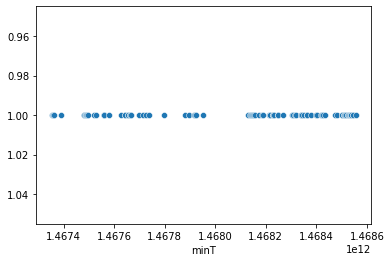

In [27]:
# Time series plots of moriarty
sns.scatterplot(data=MoriartySessions, x='minT', y=1)
plt.gca().invert_yaxis()
plt.show()

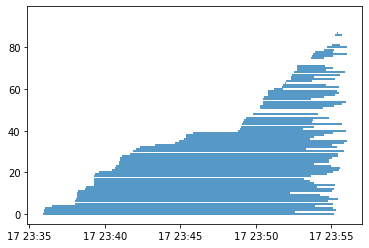

In [28]:
# Duration of moriarty
#sns.scatterplot(data=MoriartySessions, x='sessionID', y='Duration')
#plt.gca().invert_yaxis()
#plt.show()
# need to find different x axis, time

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
ax = plt.hlines(MoriartySessions.index, dt.date2num(MoriartySessions.minT), dt.date2num(MoriartySessions.maxT))

In [29]:
# plot intra-session moriarty behavorior

## Feature engineering of Moriarty

In [30]:
binary = {'benign': 0, 'malicious': 1}
MoriartyProbe = MoriartyProbe.replace({'actionType':binary})
MoriartyProbe = MoriartyProbe.replace({'sessionType':binary})
MoriartyProbe = MoriartyProbe.replace({'behavior':binary})
MoriartyProbe

,userid,uuid,details,action,actionType,sessionType,Mor_version,sessionID,behavior,trigger_MoriartyProbe
0,9f7c0cf3ba,1467352800388,Entered Level view,View Change,0,1,6.0,5,0,1
1,9f7c0cf3ba,1467352802547,Entered Game Details view,View Change,0,1,6.0,5,0,1
2,9f7c0cf3ba,1467352807124,Entered Bonus Equip view,View Change,0,1,6.0,5,0,1
3,9f7c0cf3ba,1467352809215,Entered Game view,View Change,0,1,6.0,5,0,1
4,9f7c0cf3ba,1467352809242,App Entered onPause(),App Mode Change,0,1,6.0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
9141,9f7c0cf3ba,1468556763876,Opening app install page in the play store(app...,Starting External Activity,1,1,7.0,32,ForwardToPlayStore,1
9142,dd25a68e9e,1468557111109,Pop Advertisement Notification(ad);amazon,Post Notification,1,1,7.0,95,NotificationBarAd,1
9143,72edf5f08f,1468560360386,Pop Advertisement Notification(ad);zap,Post Notification,1,1,7.0,73,NotificationBarAd,1
9144,72edf5f08f,1468560395554,Advertisement Notification Deleted(ad);zap,Notification Removed,1,1,7.0,0,NotificationBarAd,1


### Sensors

In [31]:
#T2['magAccel'] = magVector(T2,'AccelerometerStat_x_MIDDLE_SAMPLE',
#                           'AccelerometerStat_y_MIDDLE_SAMPLE',
#                           'AccelerometerStat_z_MIDDLE_SAMPLE')
#T2['magMag'] = magVector(T2,'MagneticField_x_MIDDLE_SAMPLE',
#                           'MagneticField_y_MIDDLE_SAMPLE',
#                           'MagneticField_z_MIDDLE_SAMPLE')
#T2.head(3)

In [32]:
# plots of sensors in time...

## Extract Moriarty across datasets

In [33]:
#pd.Series(Moriarty_tsv.uuid.values,index=Moriarty_tsv.uuid.values).to_dict()

### Screen On

In [34]:
# Combine T4 with append with Moriarty 
#Merged = T4_tsv.append(Moriarty_tsv, sort=True)
#Merged = Merged.sort_values(by='uuid')

# Pad downwards into T4
#Merged[['actionType', 'sessionType']] = Merged[['actionType', 'sessionType']].fillna(method='pad', limit=5)  #5 rows only

# Delete everything that is not Moriarty or within ____ samples from Moriarty
#Merged = Merged.dropna(subset=['sessionType'])
######################################################
# Combine Merged with append with Screenon
#Merged = Merged.append(Screenon_tsv, sort=True)
#Merged = Merged.sort_values(by='uuid')
#print(Merged.shape)

# Pad downwards into T4
#Merged[['actionType', 'sessionType']] = Merged[['actionType', 'sessionType']].fillna(method='pad', limit=5)  #5 rows only

# Delete everything that is not Moriarty or within ____ samples from Moriarty
#Merged = Merged.dropna(subset=['sessionType'])
######################################################
# Combine Merged with append with T1
#Merged = Merged.append(T1_tsv, sort=True)
#Merged = Merged.sort_values(by='uuid')
#print(Merged.shape)

# Pad downwards into T4
#Merged[['actionType', 'sessionType']] = Merged[['actionType', 'sessionType']].fillna(method='pad', limit=5)  #5 rows only

# Delete everything that is not Moriarty or within ____ samples from Moriarty
#Merged = Merged.dropna(subset=['sessionType'])
######################################################
# Combine Merged with append with Bluetooth
#Merged = Merged.append(Bluetooth_tsv, sort=True)
#Merged = Merged.sort_values(by='uuid')
#print(Merged.shape)

# Pad downwards into T4
#Merged[['actionType', 'sessionType']] = Merged[['actionType', 'sessionType']].fillna(method='pad', limit=5)  #5 rows only

# Delete everything that is not Moriarty or within ____ samples from Moriarty
#Merged = Merged.dropna(subset=['sessionType'])
######################################################
# Combine Merged with append with Userpresentprobe
#Merged = Merged.append(Userpresentprobe_tsv, sort=True)
#Merged = Merged.sort_values(by='uuid')
#print(Merged.shape)

# Pad downwards into T4
#Merged[['actionType', 'sessionType']] = Merged[['actionType', 'sessionType']].fillna(method='pad', limit=5)  #5 rows only

# Delete everything that is not Moriarty or within ____ samples from Moriarty
#Merged = Merged.dropna(subset=['sessionType'])
######################################################
# Combine Merged with append with Wifi
#Merged = Merged.append(Wifi_tsv, sort=True)
#Merged = Merged.sort_values(by='uuid')
#print(Merged.shape)

# Pad downwards into T4
#Merged[['actionType', 'sessionType']] = Merged[['actionType', 'sessionType']].fillna(method='pad', limit=5)  #5 rows only

# Delete everything that is not Moriarty or within ____ samples from Moriarty
#Merged = Merged.dropna(subset=['sessionType'])
#Merged.head(20)

In [35]:
#print('Moriarty Sessions: ', Merged.sessionType.count())
#print(Merged.groupby('sessionType')['uuid'].nunique())
#Merged.groupby('actionType')['uuid'].nunique()
# should drop the non-benign/malicious....

# Perform true merges on exact uuid

In [36]:
# TSV
#print('Bluetooth_tsv.shape ', Bluetooth_tsv.shape)
#print('Moriarty_tsv.shape  ', Moriarty_tsv.shape)
#print('Screenon_tsv.shape  ', Screenon_tsv.shape)
#print('T1_tsv.shape        ', T1_tsv.shape)
#print('T4_tsv              ', T4_tsv.shape)
#print('Userpresentprobe_tsv',Userpresentprobe_tsv.shape)
#print('Wifi_tsv            ',Wifi_tsv.shape)

#print('M+Blue     ',pd.merge(left=Moriarty_tsv, right=Bluetooth_tsv, how='outer',left_on='uuid', right_on='uuid').shape)
#print('M+Screen   ',pd.merge(left=Moriarty_tsv, right=Screenon_tsv,  how='outer',left_on='uuid', right_on='uuid').shape)
#print('M+T1       ',pd.merge(left=Moriarty_tsv, right=T1_tsv,        how='outer',left_on='uuid', right_on='uuid').shape)
#print('M+T4       ',pd.merge(left=Moriarty_tsv, right=T4_tsv,        how='outer',left_on='uuid', right_on='uuid').shape)
#print('M+User     ',pd.merge(left=Moriarty_tsv, right=Userpresentprobe_tsv, how='outer', left_on='uuid', right_on='uuid').shape)
#print('M+Wifi     ',pd.merge(left=Moriarty_tsv, right=Wifi_tsv, how='outer', left_on='uuid', right_on='uuid').shape)

#test = pd.merge(Moriarty_tsv, Bluetooth_tsv, how='left',on=['uuid', 'uuid'])
#test = pd.merge(test, Screenon_tsv, how='left',on=['uuid', 'uuid'])
#test = pd.merge(test, T1_tsv, how='left',on=['uuid', 'uuid'])
#test = pd.merge(test, T4_tsv, how='left',on=['uuid', 'uuid'])
#test = pd.merge(test, Userpresentprobe_tsv, how='left',on=['uuid', 'uuid'])
#test = pd.merge(test, Wifi_tsv, how='left',on=['uuid', 'uuid'])
#test = test.dropna(subset=['action'])
#print('test.shape  ', test.shape)
#test.head(20)



#print('T4+T1   ',pd.merge(left=T4_tsv, right=T1_tsv, how='outer',left_on='uuid', right_on='uuid').shape)
#T4T1_exact = pd.merge(left=T4_tsv, right=T1_tsv, how='outer',left_on='uuid', right_on='uuid')
#T4_exact = T4T1_exact.dropna(subset=['Traffic_timestamp'])
#T4_exact.head(100)

#Moriarty_tsv['uuid'].dt.round('1s').head()
#T4_tsv['uuid'].dt.round('1s').head()
#print('M+T4 ROUNDED     ',pd.merge(left=Moriarty_tsv, right=Bluetooth_tsv, left_on='uuidROUND', right_on='uuidROUND').shape)

#pd.merge(left=Moriarty_tsv, right=Screenon_tsv, how='outer', left_on='uuid', right_on='uuid').head(20)


#print(pd.merge(left=Moriarty_tsv, right=Userpresentprobe_tsv, left_on='uuid', right_on='uuid').shape)
#merged_left = pd.merge(left=Moriarty_tsv, right=Screenon_tsv, how='left', left_on='uuid', right_on='uuid')
#merged_left.tail(200)

# Populate by unique user

In [37]:
#for user in MoriartyUsers:
#    print(user, T4_tsv[T4_tsv['userid'] == user].shape)

In [38]:
# Create blank merging dataframe
#MergedByUniqUser = pd.DataFrame()

for user in MoriartyUsers:
    # Extract for unique user
    dfMor = MoriartyProbe[MoriartyProbe['userid'] == user]
    print(user, 'occurs', dfMor.shape[0], 'times in Moriarty')

    # Combine T4 with append with Moriarty
    #print(user, 'occurs in T4  ', T4_tsv[T4_tsv['userid'] == user].shape)
#    dfT4 = T4_tsv[T4_tsv['userid'] == user]
#    dfT4Mor = pd.merge(dfT4, dfMor, how='outer',on=['uuid', 'uuid'])
#    dfT4Mor = dfT4Mor.sort_values(by='uuid')
    #print('dfT4Mor.shape after merge', dfT4Mor.shape)
    # Pad malicious downwards into T4
    #dfT4Mor[['actionType', 'sessionType']] = dfT4Mor[['actionType', 'sessionType']].fillna(method='pad', limit=1)  #1 rows only
#    dfT4Mor = dfT4Mor.fillna(method='pad', limit=10)  #10 rows only 
    # replace NaN's with benign / benign?

    # Combine T1 with append with Moriarty
    #print(user, 'occurs in T1  ', T1_tsv[T1_tsv['userid'] == user].shape)
#    dfT1 = T1_tsv[T1_tsv['userid'] == user]
#    dfT1Mor = pd.merge(dfT1, dfMor, how='outer',on=['uuid', 'uuid'])
#    dfT1Mor = dfT1Mor.sort_values(by='uuid')
    #print('dfT1Mor.shape after merge', dfT1Mor.shape)
    # Pad malicious downwards into T1
    #dfT1Mor[['actionType', 'sessionType']] = dfT1Mor[['actionType', 'sessionType']].fillna(method='pad', limit=1)  #1 rows only
#    dfT1Mor = dfT1Mor.fillna(method='pad', limit=10)  #10 rows only 
    # replace NaN's with benign / benign?

    # Combine Screenon with append with Moriarty
    #print(user, 'occurs in Screenon  ', Screenon_tsv[Screenon_tsv['userid'] == user].shape)
#    dfScreenon = Screenon_tsv[Screenon_tsv['userid'] == user]
#    dfScreenonMor = pd.merge(dfScreenon, dfMor, how='outer',on=['uuid', 'uuid'])
#    dfScreenonMor = dfScreenonMor.sort_values(by='uuid')
    #print('dfScreenonMor.shape after merge', dfScreenonMor.shape)
    # Pad malicious downwards into Screenon
    #dfScreenonMor[['actionType', 'sessionType']] = dfScreenonMor[['actionType', 'sessionType']].fillna(method='pad', limit=1)  #1 rows only
#    dfScreenonMor = dfScreenonMor.fillna(method='pad', limit=10)  #10 rows only 
    # replace NaN's with benign / benign?
    
    # Combine Userpresent with append with Moriarty
    #print(user, 'occurs in Userpresent  ', Userpresent_tsv[Userpresent_tsv['userid'] == user].shape)
#    dfUserpresent = Userpresentprobe_tsv[Userpresentprobe_tsv['userid'] == user]
#    dfUserpresentMor = pd.merge(dfUserpresent, dfMor, how='outer',on=['uuid', 'uuid'])
#    dfUserpresentMor = dfUserpresentMor.sort_values(by='uuid')
    #print('dfUserpresentMor.shape after merge', dfUserpresentMor.shape)
    # Pad malicious downwards into Userpresent
    #dfUserpresentMor[['actionType', 'sessionType']] = dfUserpresentMor[['actionType', 'sessionType']].fillna(method='pad', limit=1)  #1 rows only
#    dfUserpresentMor = dfUserpresentMor.fillna(method='pad', limit=10)  #10 rows only 
    # replace NaN's with benign / benign?

    # Combine Bluetooth with append with Moriarty
    #print(user, 'occurs in Bluetooth  ', Bluetooth_tsv[Bluetooth_tsv['userid'] == user].shape)
#    dfBluetooth = Bluetooth_tsv[Bluetooth_tsv['userid'] == user]
#    dfBluetoothMor = pd.merge(dfBluetooth, dfMor, how='outer',on=['uuid', 'uuid'])
#    dfBluetoothMor = dfBluetoothMor.sort_values(by='uuid')
    #print('dfBluetoothMor.shape after merge', dfBluetoothMor.shape)
    # Pad malicious downwards into Bluetooth
    #dfBluetoothMor[['actionType', 'sessionType']] = dfBluetoothMor[['actionType', 'sessionType']].fillna(method='pad', limit=1)  #1 rows only
#    dfBluetoothMor = dfBluetoothMor.fillna(method='pad', limit=10)  #10 rows only 
    # replace NaN's with benign / benign?

    # Below is kinda whatever, but get's data out the door...
    
    # Merging of different dataframes
#    dfTempMerge = dfT4Mor.append([dfT1Mor, dfScreenonMor, dfUserpresentMor, dfBluetoothMor], sort=True)
#    dfTempMerge = dfTempMerge.sort_values(by='uuid')
#    dfTempMerge = dfTempMerge.fillna(method='pad')
#    dfTempMerge = dfTempMerge.drop_duplicates()
    #print('outputdf.shape', dfTempMerge.shape)

#    MergedByUniqUser = MergedByUniqUser.append(dfTempMerge)
#    print(MergedByUniqUser.shape)

#MergedByUniqUser = MergedByUniqUser.sort_values(by='uuid') 
#MergedByUniqUser = MergedByUniqUser.drop_duplicates()
#print('MergedByUniqUser.shape', MergedByUniqUser.shape)
#MergedByUniqUser.tail(20)

9f7c0cf3ba occurs 205 times in Moriarty
72edf5f08f occurs 243 times in Moriarty
5c1f751a99 occurs 684 times in Moriarty
8960d74df5 occurs 81 times in Moriarty
68a5ffab20 occurs 139 times in Moriarty
f68d404dec occurs 139 times in Moriarty
ec3b3592f1 occurs 246 times in Moriarty
1775bd8416 occurs 412 times in Moriarty
73e9841e35 occurs 826 times in Moriarty
b63c849327 occurs 335 times in Moriarty
fd2db8f0be occurs 190 times in Moriarty
688dccef72 occurs 800 times in Moriarty
0a50e09262 occurs 239 times in Moriarty
55153967c4 occurs 198 times in Moriarty
3e9c54bce7 occurs 29 times in Moriarty
fdbca31c28 occurs 94 times in Moriarty
b298fa1895 occurs 242 times in Moriarty
909a83fa62 occurs 153 times in Moriarty
bca57e81a1 occurs 336 times in Moriarty
56d7a3b146 occurs 358 times in Moriarty
d35184bc22 occurs 41 times in Moriarty
aa2e99301a occurs 258 times in Moriarty
a4f29791af occurs 190 times in Moriarty
97bb95f55a occurs 270 times in Moriarty
e22b9f3772 occurs 137 times in Moriarty
8ef4

see merge_asof() in https://pandas.pydata.org/docs/user_guide/merging.html

 # Below is matching pyspark

In [39]:
MoriartyProbe_b63c849327 = MoriartyProbe[MoriartyProbe['userid'] == "b63c849327"]
AppPackages_b63c849327 = AppPackages[AppPackages['userid'] == "b63c849327"]
ScreenStatus_b63c849327 = ScreenStatus[ScreenStatus['userid'] == "b63c849327"]
SMS_b63c849327 = SMS[SMS['userid'] == "b63c849327"]
UserPresence_b63c849327 = UserPresence[UserPresence['userid'] == "b63c849327"]
T4_b63c849327 = T4[T4['userid'] == "b63c849327"]

In [40]:
MoriartyProbe_b63c849327.shape

(335, 10)

In [41]:
MergedDF_b63c849327 = pd.merge(MoriartyProbe_b63c849327,AppPackages_b63c849327,on='uuid',how='outer')
MergedDF_b63c849327 = pd.merge(MergedDF_b63c849327,ScreenStatus_b63c849327,on='uuid',how='outer')
MergedDF_b63c849327 = pd.merge(MergedDF_b63c849327,SMS_b63c849327,on='uuid',how='outer')
MergedDF_b63c849327 = pd.merge(MergedDF_b63c849327,UserPresence_b63c849327,on='uuid',how='outer')

#T4_b63c849327['uuid'] = T4_b63c849327['uuid'].astype(int)
MergedDF_b63c849327 = pd.merge(MergedDF_b63c849327,T4_b63c849327,on='uuid',how='outer')
MergedDF_b63c849327 = MergedDF_b63c849327.sort_values(by=['uuid'])

In [42]:
print(MergedDF_b63c849327.shape)

(167614, 166)


In [43]:
MergedDF_b63c849327['sessionType'].head(50)

5643   NaN
5644   NaN
5645   NaN
5646   NaN
5647   NaN
        ..
5688   NaN
5689   NaN
5690   NaN
5691   NaN
5692   NaN
Name: sessionType, Length: 50, dtype: float64

In [44]:
mSessList = MergedDF_b63c849327['sessionID'].unique()
minT = []
maxT = []
for i, ses in enumerate(mSessList):
    x = MergedDF_b63c849327[MergedDF_b63c849327['sessionID'] == ses]['uuid'].min()
    y = MergedDF_b63c849327[MergedDF_b63c849327['sessionID'] == ses]['uuid'].max()
    minT.append(x)
    maxT.append(y)

MoriartySessions = pd.concat([pd.Series(mSessList,name='sessionID'),
                              pd.Series(minT,name='minT'),
                              pd.Series(maxT,name='maxT')], axis=1)
MoriartySessions['Duration'] = MoriartySessions['maxT'] - MoriartySessions['minT']
MoriartySessions.shape

(21, 4)

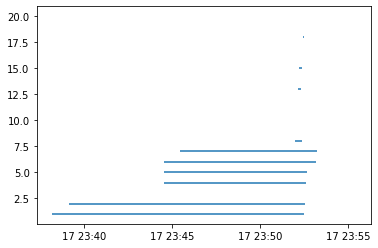

In [45]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
ax = plt.hlines(MoriartySessions.index, dt.date2num(MoriartySessions.minT), dt.date2num(MoriartySessions.maxT))

In [46]:
MoriartySessions

,sessionID,minT,maxT,Duration
0,NaN,NaN,NaN,NaN
1,14.0,1.467490e+12,1.468347e+12,856977627.0
2,15.0,1.467549e+12,1.468353e+12,803359833.0
3,16.0,1.467578e+12,1.467579e+12,242507.0
4,17.0,1.467871e+12,1.468355e+12,484022410.0
...,...,...,...,...
16,9.0,1.468344e+12,1.468344e+12,55430.0
17,10.0,1.468344e+12,1.468345e+12,875167.0
18,12.0,1.468347e+12,1.468347e+12,332367.0
19,22.0,1.468526e+12,1.468526e+12,196118.0


In [47]:
for idx, xxx in enumerate(MoriartySessions):
    print(xxx)

    
    
    



sessionID
minT
maxT
Duration


In [48]:
MoriartySessions.type()

AttributeError: 'DataFrame' object has no attribute 'type'

# Above is matching pyspark

In [ ]:
filteredMerged = pd.DataFrame()

for index, row in MoriartySessions.iterrows():
    data = Merged[(Merged['UUID'] > row['minT']) & (Merged['UUID'] < row['maxT'])]
    filteredMerged = filteredMerged.append(data, ignore_index=True)
    
filteredMerged[['SessionID', 'SessionType', 'Version']] = filteredMerged[['SessionID', 'SessionType', 'Version']].fillna(method="pad")

In [ ]:
# next steps - integer encode unique - aggregate Success...
filteredMerged['Details'].unique()

In [ ]:
#unit type action type
#malicious vs benigin

In [ ]:
###### predict is screen on from magnitude

In [ ]:
#### predict screen on moriarty...

In [ ]:
sns.distplot(T2['AccelerometerStat_x_MIDDLE_SAMPLE'])
plt.title('Histogram: AccelerometerStat_x_MIDDLE_SAMPLE')
plt.xlabel('_something_')
f = plt.gcf()
f.set_size_inches(6,3)
plt.show()

### Goofy stuff

In [ ]:
t2_accelero = T2[['AccelerometerStat_x_MIDDLE_SAMPLE', 
                  'AccelerometerStat_y_MIDDLE_SAMPLE', 
                  'AccelerometerStat_z_MIDDLE_SAMPLE',
                  'pressure_MIDDLE_SAMPLE']]

t2_accelero.isnull().values.any()
t2_accelero = t2_accelero.dropna()
t2_accelero.isnull().values.any()

t2_accelero_X = t2_accelero[['AccelerometerStat_x_MIDDLE_SAMPLE', 
                  'AccelerometerStat_y_MIDDLE_SAMPLE', 
                  'AccelerometerStat_z_MIDDLE_SAMPLE']]
t2_accelero_y = t2_accelero[['pressure_MIDDLE_SAMPLE']]

X_train, X_test, y_train, y_test = train_test_split(t2_accelero_X, t2_accelero_y, random_state=42)

### Pipeline for pipeline assignment

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

Pretty poor, eh?  Well, what would you expect from a random grab...

### Pickle the model

In [ ]:
with open('model.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(pipe, f, pickle.HIGHEST_PROTOCOL)

### Create faux-data

In [ ]:
print(X_test[0:2].values.tolist())

In [ ]:
#Export as json
import json

data = X_test[0:2].values.tolist()

with open('testdata.json', 'w') as f:
    json.dump(data, f)

### Tests

In [ ]:
from newdata import newdata
newdata

In [ ]:
with open('model.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    pipePKL = pickle.load(f)

In [ ]:
predictions = pipePKL.predict(newdata)
print(predictions)